In [ ]:
# https://www.codemotion.com/magazine/dev-hub/machine-learning-dev/how-to-build-a-gan-in-python/

In [1]:
import numpy as np
import pandas as pd
from numpy.random import uniform 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization, MaxPooling2D, Flatten
from keras.layers.convolutional import Conv2D, Conv1D
# import libraries
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where

In [190]:
totals=pd.read_excel('train_test_totals.xlsx')
totals_rpm=totals[(totals['RPM'] >= 4850) & (totals['RPM'] <=5000)]
totals  

,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9021A,A2V9019A,A2V9018A,A2V9005A2,A2V9004A2,A2V9007A2,A2V9006A2,A2V9025A2,A2V9024A2,A2V9027A2,A2V9026A2,A2V9022A2,A2V9029A2,A2V9028A2,A3V9005A3,A3V9004A3,A3V9007A3,A3V9006A3,A3V9035A3,A3V9034A3,A3V9037A3,A3V9036A3,A3V9033A3,A3V9039A3,A3V9038A3,A4V9005A4,A4V9004A4,A4V9007A4,A4V9006A4,A4V9045A4,A4V9044A4,A4V9047A4,...,A7V9007A7.1,A7V9007A7.2,A7V9007A7.3,A7V9077A7,A7V9077A7.1,A7V9077A7.2,A7V9077A7.3,A7V9077A7.4,A7V9079A7,A7V9078A7,A8V9008A8,A8V9008A8.1,A8V9008A8.2,A8V9008A8.3,A8V9088A8,A8V9088A8.1,A8V9088A8.2,A8V9088A8.3,A8V9088A8.4,A8V9089A8,A8V9088A8.5,A9V9009A9,A9V9009A9.1,A9V9009A9.2,A9V9009A9.3,A9V9099A9,A9V9099A9.1,A9V9099A9.2,A9V9099A9.3,A9V9099A9.4,A9V9099A9.5,A9V9099A9.6,RPM,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4875.7,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4876.0,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,...,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4876.8,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4877.4,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4875.2,5.8,6.0,4950,0.219939,0.081030,0.177495,0.054020,0.050162,0.018521,0.069455
1,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4875.7,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4876.0,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,...,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4876.8,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4877.4,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4875.2,5.8,6.0,4950,0.339556,0.162061,0.258525,0.115758,0.054020,0.013119,0.050162
2,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4875.7,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4876.0,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,...,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4876.8,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4877.4,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4875.2,5.8,6.0,4950,0.339556,0.088747,0.223798,0.219939,0.081030,0.007331,0.033184
3,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4875.7,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4876.0,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,...,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4876.8,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4877.4,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4875.2,5.8,6.0,4950,1.589737,0.081030,0.046303,0.065596,0.270101,1.524141,0.358848
4,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4873.8,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4875.7,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,...,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4875.7,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4876.8,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4877.4,5.8,6.0,4950,1.778808,0.212222,0.158202,0.077172,0.100323,1.697778,0.455313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5043.3,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5042.4,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5044.6,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,...,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5043.1,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5042.9,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5042.1,8.1,8.6,5050,0.737525,0.113465,0.113465,0.029501,0.045386,0.677010,0.211802
840,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5043.6,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5043.3,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5042.4,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,...,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5043.5,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5043.1,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5042.9,8.1,8.6,5050,0.608931,0.139941,0.268535,0.032149,0.079426,0.465208,0.245842
841,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5043.6,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5043.3,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5042.4,8.1,8.6,1.7,1.

In [162]:
totals1=totals.iloc[:,100:107]
totals_rpm1=totals_rpm.iloc[:,100:107]

In [191]:
svm_model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .05).fit(totals_rpm.iloc[:,100:107])
y_pred_05 = svm_model.predict(totals_rpm.iloc[:,100:107])
outliers_index_05 = where(y_pred_05 == -1) 
normals_index_05 = where(y_pred_05 == 1) 
svm_outlier_05 = totals_rpm.iloc[outliers_index_05]
svm_normal_05=totals_rpm.iloc[normals_index_05]

In [192]:
svm_model1 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .10).fit(totals_rpm.iloc[:,100:107])
y_pred_10 = svm_model1.predict(totals_rpm.iloc[:,100:107])
outliers_index_10 = where(y_pred_10 == -1) 
normals_index_10 = where(y_pred_10 == 1) 
svm_outlier_10 = totals_rpm.iloc[outliers_index_10]
svm_normal_10=totals_rpm.iloc[normals_index_10]

In [193]:
svm_model2 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .15).fit(totals_rpm.iloc[:,100:107])
y_pred_15 = svm_model1.predict(totals_rpm.iloc[:,100:107])
outliers_index_15 = where(y_pred_15 == -1) 
normals_index_15 = where(y_pred_15 == 1) 
svm_outlier_15 = totals_rpm.iloc[outliers_index_15]
svm_normal_15=totals_rpm.iloc[normals_index_15]

In [194]:
svm_model3 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .20).fit(totals_rpm.iloc[:,100:107])
y_pred_20 = svm_model3.predict(totals_rpm.iloc[:,100:107])
outliers_index_20 = where(y_pred_20 == -1) 
normals_index_20 = where(y_pred_20 == 1) 
svm_outlier_20 = totals_rpm.iloc[outliers_index_20]
svm_normal_20=totals_rpm.iloc[normals_index_20]

In [195]:
svm_model4 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .25).fit(totals_rpm.iloc[:,100:107])
y_pred_25 = svm_model4.predict(totals_rpm.iloc[:,100:107])
outliers_index_25 = where(y_pred_25 == -1) 
normals_index_25= where(y_pred_25 == 1) 
svm_outlier_25 = totals_rpm.iloc[outliers_index_25]
svm_normal_25=totals_rpm.iloc[normals_index_25]

In [196]:
svm_model5 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .30).fit(totals_rpm.iloc[:,100:107])
y_pred_30 = svm_model5.predict(totals_rpm.iloc[:,100:107])
outliers_index_30 = where(y_pred_30 == -1) 
normals_index_30= where(y_pred_30 == 1) 
svm_outlier_30 = totals_rpm.iloc[outliers_index_30]
svm_normal_30=totals_rpm.iloc[normals_index_30]

In [200]:
svm_normal_05=svm_normal_05[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A', 'A2V9014A',
       'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A','param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS']]
svm_normal_10=svm_normal_10[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A', 'A2V9014A',
       'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A','param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS']]
svm_normal_15=svm_normal_15[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A', 'A2V9014A',
       'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A','param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS']]   
svm_normal_20=svm_normal_20[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A', 'A2V9014A',
       'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A','param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS']]  
svm_normal_25=svm_normal_25[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A', 'A2V9014A',
       'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A','param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS']]
svm_normal_30=svm_normal_30[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A', 'A2V9014A',
       'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A','param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS']]

In [199]:
svm_outlier_05=svm_outlier_05[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A', 'A2V9014A',
       'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A','param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS']]
svm_outlier_10=svm_outlier_10[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A', 'A2V9014A',
       'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A','param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS']]
svm_outlier_15=svm_outlier_15[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A', 'A2V9014A',
       'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A','param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS']]   
svm_outlier_20=svm_outlier_20[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A', 'A2V9014A',
       'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A','param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS']]  
svm_outlier_25=svm_outlier_25[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A', 'A2V9014A',
       'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A','param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS']]
svm_outlier_30=svm_outlier_30[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A', 'A2V9014A',
       'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A','param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS']]

In [201]:
svm_normal_05

,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9021A,A2V9019A,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,0.219939,0.081030,0.177495,0.054020,0.050162,0.018521,0.069455
1,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,0.339556,0.162061,0.258525,0.115758,0.054020,0.013119,0.050162
2,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,0.339556,0.088747,0.223798,0.219939,0.081030,0.007331,0.033184
3,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,1.589737,0.081030,0.046303,0.065596,0.270101,1.524141,0.358848
4,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4873.8,5.8,1.778808,0.212222,0.158202,0.077172,0.100323,1.697778,0.455313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5041.3,8.1,0.803381,0.102392,0.043320,0.070887,0.133897,0.728557,0.283546
831,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5042.2,8.1,0.578907,0.126021,0.185093,0.024416,0.047258,0.511959,0.137835
832,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5042.2,8.1,0.511959,0.220536,0.378062,0.035443,0.066948,0.181155,0.181155
834,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5044.6,8.1,0.460763,0.220536,0.196907,0.039381,0.063010,0.145711,0.315052


In [172]:
df1=pd.read_csv("svm_normals_05_y.csv")
svm_normals_05_y=pd.read_csv('svm_normals_05_y.csv').iloc[:,1:]
df1=df1.iloc[:,1:]
#df1=df.iloc[:, 4:11]
#df1=svm_normals_05
# normalize the df1
#scaler = MinMaxScaler() 
#scaled_values = scaler.fit_transform(df1) 
#df1.loc[:,:] = scaled_values
df1

,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,0.433847,0.058918,0.428491,0.034815,0.041778,0.011784,0.031066
1,0.465984,0.455272,0.052490,0.040171,0.050348,0.008570,0.044992
2,0.283875,0.123191,0.176753,0.037493,0.058918,0.019282,0.074986
3,0.186558,0.066628,0.155465,0.008884,0.062186,0.005330,0.030649
4,0.219939,0.081030,0.177495,0.054020,0.050162,0.018521,0.069455
...,...,...,...,...,...,...,...
797,0.362487,0.127256,0.158106,0.042419,0.104119,0.088694,0.258369
798,0.477500,0.115396,0.230792,0.037802,0.083563,0.206917,0.330271
799,0.608931,0.139941,0.268535,0.032149,0.079426,0.465208,0.245842
800,0.469542,0.139271,0.250688,0.028252,0.131313,0.206917,0.274563


In [173]:
svm_outliers_05_x=pd.read_csv('svm_outliers_05_x.csv')
svm_outliers_10_x=pd.read_csv('svm_outliers_10_x.csv')
svm_outliers_15_x=pd.read_csv('svm_outliers_15_x.csv')
svm_outliers_20_x=pd.read_csv('svm_outliers_20_x.csv')
svm_outliers_25_x=pd.read_csv('svm_outliers_25_x.csv')
svm_outliers_30_x=pd.read_csv('svm_outliers_30_x.csv')
svm_normals_05_x=pd.read_csv('svm_normals_05_x.csv')
svm_normals_10_x=pd.read_csv('svm_normals_10_x.csv')
svm_normals_15_x=pd.read_csv('svm_normals_15_x.csv')
svm_normals_20_x=pd.read_csv('svm_normals_20_x.csv')
svm_normals_25_x=pd.read_csv('svm_normals_25_x.csv')
svm_normals_30_x=pd.read_csv('svm_normals_30_x.csv')
svm_outliers_05_y=pd.read_csv('svm_outliers_05_y.csv')
svm_outliers_10_y=pd.read_csv('svm_outliers_10_y.csv')
svm_outliers_15_y=pd.read_csv('svm_outliers_15_y.csv')
svm_outliers_20_y=pd.read_csv('svm_outliers_20_y.csv')
svm_outliers_25_y=pd.read_csv('svm_outliers_25_y.csv')
svm_outliers_30_y=pd.read_csv('svm_outliers_30_y.csv')
svm_normals_05_y=pd.read_csv('svm_normals_05_y.csv')
svm_normals_10_y=pd.read_csv('svm_normals_10_y.csv')
svm_normals_15_y=pd.read_csv('svm_normals_15_y.csv')
svm_normals_20_y=pd.read_csv('svm_normals_20_y.csv')
svm_normals_25_y=pd.read_csv('svm_normals_25_y.csv')
svm_normals_30_y=pd.read_csv('svm_normals_30_y.csv')
svm_normals_10_x=svm_normals_10_x.iloc[: , 1:]
svm_normals_15_x=svm_normals_15_x.iloc[: , 1:]
svm_normals_20_x=svm_normals_20_x.iloc[: , 1:]
svm_normals_25_x=svm_normals_25_x.iloc[: , 1:]
svm_normals_30_x=svm_normals_30_x.iloc[: , 1:]
svm_normals_05_x=svm_normals_05_x.iloc[: , 1:]
svm_normals_10_y=svm_normals_10_y.iloc[: , 1:]
svm_normals_15_y=svm_normals_15_y.iloc[: , 1:]
svm_normals_20_y=svm_normals_20_y.iloc[: , 1:]
svm_normals_25_y=svm_normals_25_y.iloc[: , 1:]
svm_normals_30_y=svm_normals_30_y.iloc[: , 1:]
svm_normals_05_y=svm_normals_05_y.iloc[: , 1:]
svm_outliers_10_x=svm_outliers_10_x.iloc[: , 1:]
svm_outliers_15_x=svm_outliers_15_x.iloc[: , 1:]
svm_outliers_20_x=svm_outliers_20_x.iloc[: , 1:]
svm_outliers_25_x=svm_outliers_25_x.iloc[: , 1:]
svm_outliers_30_x=svm_outliers_30_x.iloc[: , 1:]
svm_outliers_05_x=svm_outliers_05_x.iloc[: , 1:]
svm_outliers_10_y=svm_outliers_10_y.iloc[: , 1:]
svm_outliers_15_y=svm_outliers_15_y.iloc[: , 1:]
svm_outliers_20_y=svm_outliers_20_y.iloc[: , 1:]
svm_outliers_25_y=svm_outliers_25_y.iloc[: , 1:]
svm_outliers_30_y=svm_outliers_30_y.iloc[: , 1:]
svm_outliers_05_y=svm_outliers_05_y.iloc[: , 1:]

In [174]:
svm_outliers_05_y

,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,0.111899,0.111899,0.006174,0.000772,0.001543,0.000424,0.002624
1,0.128814,0.024430,0.119930,0.010216,0.030649,0.003109,0.028428
2,0.119930,0.075512,0.053302,0.053302,0.048860,0.002665,0.017323
3,0.027863,0.027470,0.003414,0.003571,0.001138,0.000137,0.000432
4,0.048661,0.041205,0.004317,0.019229,0.005494,0.000981,0.001370
5,0.040813,0.040028,0.003610,0.008241,0.001452,0.000188,0.000628
6,1.740222,0.081030,0.046303,0.088747,0.239232,1.647616,0.412869
7,1.769263,0.266395,0.150789,0.216132,0.623263,1.040447,1.352079
8,0.056510,0.016482,0.040028,0.021976,0.038851,0.000078,0.000118
9,1.778808,0.212222,0.158202,0.077172,0.100323,1.697778,0.455313


In [175]:
svm_normals_10=pd.concat([svm_normals_10_x, svm_normals_10_y], axis=1)
svm_outliers_10=pd.concat([svm_outliers_10_x, svm_outliers_10_y], axis=1)

In [176]:
svm_normals_10

,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9019A,A2V9018A,A2V9010A1,A2V9004A1,A2V9007A1,A2V9006A1,A2V9010A1.1,A2V9014A1,A2V9017A1,A2V9016A1,A2V9019A1,A2V9018A1,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,0.2,0.2,0.1,0.1,0.2,0.1,0.2,0.1,6.4,7.0,0.2,0.2,0.1,0.1,0.1,0.1,0.2,0.1,6.4,7.0,0.433847,0.058918,0.428491,0.034815,0.041778,0.011784,0.031066
1,0.2,0.2,0.1,0.1,0.2,0.1,0.2,0.1,6.4,7.0,0.2,0.2,0.1,0.1,0.1,0.1,0.2,0.1,6.4,7.0,0.465984,0.455272,0.052490,0.040171,0.050348,0.008570,0.044992
2,0.2,0.2,0.1,0.1,0.2,0.1,0.2,0.1,6.4,7.0,0.2,0.2,0.1,0.1,0.1,0.1,0.2,0.1,6.4,7.0,0.283875,0.123191,0.176753,0.037493,0.058918,0.019282,0.074986
3,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,5.8,6.0,0.219939,0.081030,0.177495,0.054020,0.050162,0.018521,0.069455
4,1.6,1.7,1.0,1.1,1.0,0.7,2.9,3.1,7.3,7.6,1.6,1.7,1.0,1.1,1.0,0.7,2.9,3.1,7.3,7.6,0.243091,0.046303,0.227657,0.038586,0.046303,0.012347,0.024695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.6,1.8,0.9,1.1,1.1,0.9,3.1,3.0,7.7,8.1,1.6,1.8,0.9,1.1,1.1,0.9,3.1,3.0,7.7,8.1,0.362487,0.127256,0.158106,0.042419,0.104119,0.088694,0.258369
752,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,0.477500,0.115396,0.230792,0.037802,0.083563,0.206917,0.330271
753,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,0.608931,0.139941,0.268535,0.032149,0.079426,0.465208,0.245842
754,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,0.469542,0.139271,0.250688,0.028252,0.131313,0.206917,0.274563


In [177]:
#df=pd.read_excel("humanfilled_params_modified.xlsx")
svm_normals_05=pd.concat([svm_normals_05_x, svm_normals_05_y], axis=1)
svm_outliers_05=pd.concat([svm_outliers_05_x, svm_outliers_05_y], axis=1)
df1_normals=svm_normals_05.copy()
# normalize the df1
'''scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df1_normals) 
df1_normals.loc[:,:] = scaled_values
df1_normals=df1_normals.iloc[:,0:26]
df1_normals.shape'''

'scaler = MinMaxScaler() \nscaled_values = scaler.fit_transform(df1_normals) \ndf1_normals.loc[:,:] = scaled_values\ndf1_normals=df1_normals.iloc[:,0:26]\ndf1_normals.shape'

In [178]:
svm_normals_05

,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9019A,A2V9018A,A2V9005A1,A2V9004A1,A2V9007A1,A2V9006A1,A2V9005A1.1,A2V9014A1,A2V9017A1,A2V9016A1,A2V9019A1,A2V9018A1,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,0.2,0.2,0.1,0.1,0.2,0.1,0.2,0.1,6.4,7.0,0.2,0.2,0.1,0.1,0.1,0.1,0.2,0.1,6.4,7.0,0.433847,0.058918,0.428491,0.034815,0.041778,0.011784,0.031066
1,0.2,0.2,0.1,0.1,0.2,0.1,0.2,0.1,6.4,7.0,0.2,0.2,0.1,0.1,0.1,0.1,0.2,0.1,6.4,7.0,0.465984,0.455272,0.052490,0.040171,0.050348,0.008570,0.044992
2,0.2,0.2,0.1,0.1,0.2,0.1,0.2,0.1,6.4,7.0,0.2,0.2,0.1,0.1,0.1,0.1,0.2,0.1,6.4,7.0,0.283875,0.123191,0.176753,0.037493,0.058918,0.019282,0.074986
3,1.7,1.7,0.8,0.8,1.1,0.9,2.8,2.7,5.1,5.7,1.7,1.7,0.8,0.8,1.1,0.9,2.8,2.7,5.1,5.7,0.186558,0.066628,0.155465,0.008884,0.062186,0.005330,0.030649
4,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,5.8,6.0,0.219939,0.081030,0.177495,0.054020,0.050162,0.018521,0.069455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,1.6,1.8,0.9,1.1,1.1,0.9,3.1,3.0,7.7,8.1,1.6,1.8,0.9,1.1,1.1,0.9,3.1,3.0,7.7,8.1,0.362487,0.127256,0.158106,0.042419,0.104119,0.088694,0.258369
798,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,0.477500,0.115396,0.230792,0.037802,0.083563,0.206917,0.330271
799,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,0.608931,0.139941,0.268535,0.032149,0.079426,0.465208,0.245842
800,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,0.469542,0.139271,0.250688,0.028252,0.131313,0.206917,0.274563


In [179]:
df1_outliers=svm_outliers_10.copy()
# normalize the df1
'''scaler = MinMaxScaler() 
scaled_values1 = scaler.fit_transform(df1_outliers) 
df1_outliers.loc[:,:] = scaled_values1
df1_outliers=df1_outliers.iloc[:,0:26]
df1_outliers.shape'''

'scaler = MinMaxScaler() \nscaled_values1 = scaler.fit_transform(df1_outliers) \ndf1_outliers.loc[:,:] = scaled_values1\ndf1_outliers=df1_outliers.iloc[:,0:26]\ndf1_outliers.shape'

In [180]:
svm_normals_05

,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9019A,A2V9018A,A2V9005A1,A2V9004A1,A2V9007A1,A2V9006A1,A2V9005A1.1,A2V9014A1,A2V9017A1,A2V9016A1,A2V9019A1,A2V9018A1,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,0.2,0.2,0.1,0.1,0.2,0.1,0.2,0.1,6.4,7.0,0.2,0.2,0.1,0.1,0.1,0.1,0.2,0.1,6.4,7.0,0.433847,0.058918,0.428491,0.034815,0.041778,0.011784,0.031066
1,0.2,0.2,0.1,0.1,0.2,0.1,0.2,0.1,6.4,7.0,0.2,0.2,0.1,0.1,0.1,0.1,0.2,0.1,6.4,7.0,0.465984,0.455272,0.052490,0.040171,0.050348,0.008570,0.044992
2,0.2,0.2,0.1,0.1,0.2,0.1,0.2,0.1,6.4,7.0,0.2,0.2,0.1,0.1,0.1,0.1,0.2,0.1,6.4,7.0,0.283875,0.123191,0.176753,0.037493,0.058918,0.019282,0.074986
3,1.7,1.7,0.8,0.8,1.1,0.9,2.8,2.7,5.1,5.7,1.7,1.7,0.8,0.8,1.1,0.9,2.8,2.7,5.1,5.7,0.186558,0.066628,0.155465,0.008884,0.062186,0.005330,0.030649
4,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,5.8,6.0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,5.8,6.0,0.219939,0.081030,0.177495,0.054020,0.050162,0.018521,0.069455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,1.6,1.8,0.9,1.1,1.1,0.9,3.1,3.0,7.7,8.1,1.6,1.8,0.9,1.1,1.1,0.9,3.1,3.0,7.7,8.1,0.362487,0.127256,0.158106,0.042419,0.104119,0.088694,0.258369
798,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,0.477500,0.115396,0.230792,0.037802,0.083563,0.206917,0.330271
799,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,0.608931,0.139941,0.268535,0.032149,0.079426,0.465208,0.245842
800,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,8.1,8.6,0.469542,0.139271,0.250688,0.028252,0.131313,0.206917,0.274563


In [181]:
from sklearn.preprocessing import StandardScaler 
scaler = MinMaxScaler()

#df2 = pd.DataFrame(df2)
SAMPLE=svm_normals_05.to_numpy()


In [182]:
humanfilled_params_modified=pd.read_excel('humanfilled_params_modified.xlsx')

In [183]:
# below are few code cells to know the ditribution of the dataset for the purpose of anomaly detection

In [184]:
#df1.hist(figsize=(12,8))

In [185]:
#df2.hist(figsize=(12,8))

In [186]:
#multivariate normality test 
#!pip install pingouin


In [187]:
#from pingouin import multivariate_normality
#H0 (null): The variables follow a multivariate normal distribution. Ha (alternative): The variables do not follow a multivariate normal distribution.
#Since the p-value of the test is less than our specified alpha value of .05, we reject the null hypothesis. 
# The dataset can't be assumed to follow a multivariate normal distribution.
#print(multivariate_normality(df1, alpha=.05))
#print(multivariate_normality(df2, alpha=.05))


ValueError: ignored

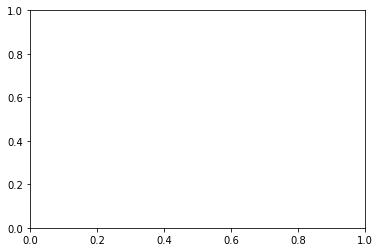

In [188]:
X_COORDS = np.linspace(0 , 1, 28)
# We plot the first 8 curves
fig, axis = plt.subplots(1, 1)
for i in range(802):
    axis.plot(X_COORDS, SAMPLE[i])

In [213]:
svm_normal_05.iloc[:,10:17]

,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,0.219939,0.081030,0.177495,0.054020,0.050162,0.018521,0.069455
1,0.339556,0.162061,0.258525,0.115758,0.054020,0.013119,0.050162
2,0.339556,0.088747,0.223798,0.219939,0.081030,0.007331,0.033184
3,1.589737,0.081030,0.046303,0.065596,0.270101,1.524141,0.358848
4,1.778808,0.212222,0.158202,0.077172,0.100323,1.697778,0.455313
...,...,...,...,...,...,...,...
830,0.803381,0.102392,0.043320,0.070887,0.133897,0.728557,0.283546
831,0.578907,0.126021,0.185093,0.024416,0.047258,0.511959,0.137835
832,0.511959,0.220536,0.378062,0.035443,0.066948,0.181155,0.181155
834,0.460763,0.220536,0.196907,0.039381,0.063010,0.145711,0.315052


In [ ]:
svm_normal_25

In [214]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
DROPOUT = Dropout(0.4)        # Empirical hyperparameter
discriminator = Sequential()
discriminator.add(Dense(7, activation="relu"))
discriminator.add(DROPOUT)
discriminator.add(Dense(58, activation="relu"))
discriminator.add(DROPOUT)
discriminator.add(Dense(1, activation = "sigmoid"))
discriminator.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [215]:
LEAKY_RELU = LeakyReLU(0.2)   # Empirical hyperparameter
generator = Sequential()
generator.add(Dense(7))
generator.add(LEAKY_RELU)
generator.add(Dense(512))
generator.add(LEAKY_RELU)
generator.add(Dense(7, activation = "tanh"))
generator.compile(optimizer = "adam", loss = "mse", metrics = ["accuracy"])

In [216]:
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [217]:
svm_normal_05

,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9021A,A2V9019A,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,0.219939,0.081030,0.177495,0.054020,0.050162,0.018521,0.069455
1,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,0.339556,0.162061,0.258525,0.115758,0.054020,0.013119,0.050162
2,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,0.339556,0.088747,0.223798,0.219939,0.081030,0.007331,0.033184
3,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,1.589737,0.081030,0.046303,0.065596,0.270101,1.524141,0.358848
4,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4873.8,5.8,1.778808,0.212222,0.158202,0.077172,0.100323,1.697778,0.455313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5041.3,8.1,0.803381,0.102392,0.043320,0.070887,0.133897,0.728557,0.283546
831,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5042.2,8.1,0.578907,0.126021,0.185093,0.024416,0.047258,0.511959,0.137835
832,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5042.2,8.1,0.511959,0.220536,0.378062,0.035443,0.066948,0.181155,0.181155
834,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5044.6,8.1,0.460763,0.220536,0.196907,0.039381,0.063010,0.145711,0.315052


In [218]:
from tensorflow.python.keras.backend import set_session
from tensorflow.python.keras.models import load_model
EPOCHS = 50
BATCH=23
X_MIN=0
X_MAX=1
SAMPLE_SIZE=435
SAMPLE_LEN=7
NOISE = np.random.uniform(X_MIN, X_MAX, size = (SAMPLE_SIZE, SAMPLE_LEN))
ONES = np.ones((SAMPLE_SIZE))
ZEROS = np.zeros((SAMPLE_SIZE))
print("epoch | dis. loss | dis. acc | gen. loss | gen. acc")
print("------+-----------+----------+-----------+----------")
 
fig = plt.figure(figsize = (8, 12))
ax_index = 1
for e in range(EPOCHS):
    for k in range(SAMPLE_SIZE//BATCH):
        # Addestra il discriminatore a riconoscere le sinusoidi vere da quelle prodotte dal generatore
        n = np.random.randint(0, SAMPLE_SIZE, size = BATCH)
        # Ora prepara un batch di training record per il discriminatore
        p = generator.predict(NOISE[n])
        x = np.concatenate((svm_normal_05.iloc[:,10:17].to_numpy()[n], p))
        y = np.concatenate((ONES[n], ZEROS[n]))
        d_result = discriminator.train_on_batch(x, y)
        discriminator.trainable = False
        g_result = gan.train_on_batch(NOISE[n], ONES[n])
        discriminator.trainable = True
        print(f" {e:04n} |  {d_result[0]:.5f}  |  {d_result[1]:.5f} |  {g_result[0]:.5f}  |  {d_result[1]:.5f}")
    # At 3, 13, 23, ... plots the last generator prediction
    '''if e % 10 == 3:
        ax = fig.add_subplot(8, 1, ax_index)
        plt.plot(X_COORDS, p[-1])
        ax.xaxis.set_visible(False)
        plt.ylabel(f"Epoch: {e}")
        ax_index += 1'''


# Plots a curve generated by the GAN
#y = generator.predict(uniform(X_MIN, X_MAX, size = (1, SAMPLE_LEN)))[0]
#ax = fig.add_subplot(8, 1, ax_index)
#plt.plot(X_COORDS, y)
#y

epoch | dis. loss | dis. acc | gen. loss | gen. acc
------+-----------+----------+-----------+----------
 0000 |  0.69590  |  0.45652 |  0.68538  |  0.45652
 0000 |  0.70801  |  0.32609 |  0.67174  |  0.32609
 0000 |  0.70878  |  0.32609 |  0.65704  |  0.32609
 0000 |  0.71748  |  0.34783 |  0.62722  |  0.34783
 0000 |  0.72516  |  0.36957 |  0.61275  |  0.36957
 0000 |  0.72465  |  0.43478 |  0.59677  |  0.43478
 0000 |  0.72828  |  0.47826 |  0.57569  |  0.47826
 0000 |  0.75082  |  0.45652 |  0.55854  |  0.45652
 0000 |  0.74596  |  0.50000 |  0.57324  |  0.50000
 0000 |  0.77154  |  0.45652 |  0.52566  |  0.45652
 0000 |  0.77624  |  0.50000 |  0.55001  |  0.50000
 0000 |  0.79561  |  0.50000 |  0.47495  |  0.50000
 0000 |  0.80652  |  0.50000 |  0.49778  |  0.50000
 0000 |  0.76656  |  0.50000 |  0.49892  |  0.50000
 0000 |  0.81822  |  0.50000 |  0.51068  |  0.50000
 0000 |  0.81734  |  0.50000 |  0.49593  |  0.50000
 0000 |  0.82924  |  0.50000 |  0.49291  |  0.50000
 0000 |  0.

<Figure size 576x864 with 0 Axes>

In [ ]:
#efining function for MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
data1=data1[['param_overall_MILS', 'param1_MILS', 'param2_MILS',
       'param3_MILS', 'param4_MILS', 'param5_MILS', 'param6_MILS']]

In [221]:
y_n_o5 = discriminator.predict(svm_normal_05.iloc[:,10:17])
y_n_10 = discriminator.predict(svm_normal_10.iloc[:,10:17])
y_n_15 = discriminator.predict(svm_normal_15.iloc[:,10:17])
y_n_20 = discriminator.predict(svm_normal_20.iloc[:,10:17])
y_n_25 = discriminator.predict(svm_normal_25.iloc[:,10:17])
y_n_30 = discriminator.predict(svm_normal_30.iloc[:,10:17])
y_o_o5 = discriminator.predict(svm_outlier_05.iloc[:,10:17])
y_o_10 = discriminator.predict(svm_outlier_10.iloc[:,10:17])
y_o_15 = discriminator.predict(svm_outlier_15.iloc[:,10:17])
y_o_20 = discriminator.predict(svm_outlier_20.iloc[:,10:17])
y_o_25 = discriminator.predict(svm_outlier_25.iloc[:,10:17])
y_o_30 = discriminator.predict(svm_outlier_30.iloc[:,10:17])
#all=discriminator.predict(totals)

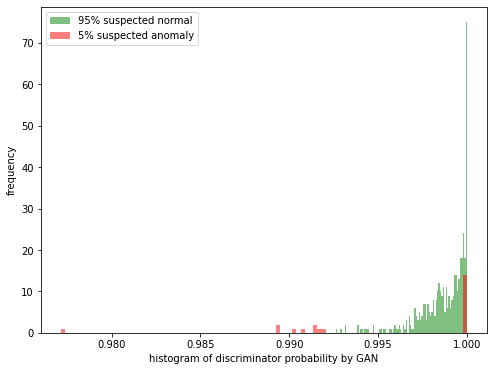

In [223]:
plt.figure(figsize=(8,6))
plt.hist(y_n_o5, bins=100, alpha=0.5, label="95% suspected normal", color='green')
plt.hist(y_o_o5, bins=100, alpha=0.5, label="5% suspected anomaly", color='red')
plt.xlabel('histogram of discriminator probability by GAN')
plt.ylabel('frequency')
plt.legend()

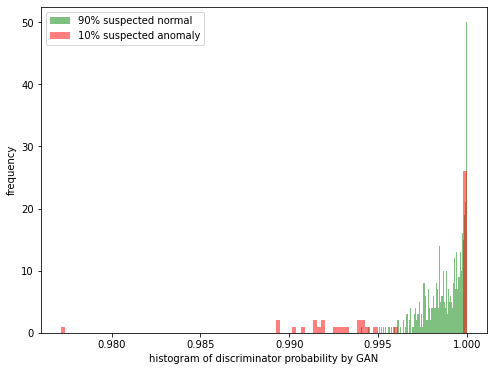

In [225]:
plt.figure(figsize=(8,6))
plt.hist(y_n_10, bins=100, alpha=0.5, label="90% suspected normal", color='green')
plt.hist(y_o_10, bins=100, alpha=0.5, label="10% suspected anomaly", color='red')
plt.xlabel('histogram of discriminator probability by GAN')
plt.ylabel('frequency')
plt.legend()

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(y_n_15, bins=100, alpha=0.5, label="85% suspected normal", color='green')
plt.hist(y_o_15, bins=100, alpha=0.5, label="15% suspected anomaly", color='red')
plt.xlabel('histogram of discriminator probability by GAN')
plt.ylabel('density')
plt.legend()

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(y_n_20, bins=100, alpha=0.5, label="80% suspected normal", color='green')
plt.hist(y_o_20, bins=100, alpha=0.5, label="20% suspected anomaly", color='red')
plt.xlabel('histogram of discriminator probability by GAN')
plt.ylabel('density')
plt.legend()

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(y_n_25, bins=100, alpha=0.5, label="75% suspected normal", color='green')
plt.hist(y_o_25, bins=100, alpha=0.5, label="25% suspected anomaly", color='red')
plt.xlabel('histogram of discriminator probability by GAN')
plt.ylabel('density')
plt.legend()

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(y_n_30, bins=100, alpha=0.5, label="70% suspected normal", color='green')
plt.hist(y_o_30, bins=100, alpha=0.5, label="30% suspected anomaly", color='red')
plt.xlabel('histogram of discriminator probability by GAN')
plt.ylabel('density')
plt.legend()

In [ ]:
print('5% normal', '5% outlier', '10% normal', '10% outlier')
print(np.min(y_n_o5), np.min(y_o_o5), np.min(y_n_10), np.min(y_o_10) )
print(np.max(y_n_o5), np.max(y_o_o5), np.max(y_n_10), np.max(y_o_10) )
print(np.std(y_n_o5), np.std(y_o_o5), np.std(y_n_10), np.std(y_o_10) )

In [ ]:
from matplotlib import pyplot
bins = np.linspace(75, 100, 200)
pyplot.hist(y_n_o5*100, bins,  label='x')
pyplot.hist(y_o_o5*100, bins,  label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
print(pd.DataFrame(df1_outliers.to_numpy()[:,20]).describe())
print(pd.DataFrame(df1_normals.to_numpy()[:,20]).describe())


In [ ]:
svm_normals_05_np=svm_normals_05.to_numpy()


In [ ]:
print(mean_absolute_percentage_error(svm_normals_05_np[:,20], y[:,20]))
print(mean_absolute_percentage_error(svm_normals_05_np[:,21], y[:,21]))
print(mean_absolute_percentage_error(svm_normals_05_np[:,22], y[:,22]))
print(mean_absolute_percentage_error(svm_normals_05_np[:,23], y[:,23]))
print(mean_absolute_percentage_error(svm_normals_05_np[:,24], y[:,24]))
print(mean_absolute_percentage_error(svm_normals_05_np[:,25], y[:,25]))
print(mean_absolute_percentage_error(svm_normals_05_np[:,26], y[:,26]))


In [ ]:
mse_30=106.37321248965328
810.0953997917281
550.3095177964432
2259.681625575611
1091.453851854204
1490.9952802746786
930.1024058583442
mse_25=307.36627710191766
1026.1364016970351
549.5597607131731
2365.9682691868893
1094.9641929635418
1845.2920565919726
1004.505189918868
mse_20=308.1801570079168
829.9559915273692
748.6820344785774
2335.035390188636
1289.3546308760165
2034.710982524108
1239.7360732370316
mse_15=111.01380441223432
835.2119268649141
559.953831688888
2094.274254598201
1294.6799406261068
2016.803083681856
1298.1744685730118
mse_10=116.40499724072603
1047.99193135056
771.8608889814612
2067.7012938431712
1111.4851623564168
2260.217114744514
1361.9959235762292

In [ ]:
np.hstack((svm_normals_05_np[:,26].reshape(586,1), y[:,26].reshape(586,1)))

In [ ]:
import itertools
classification=discriminator.predict_classes(df1_normals)
(unique, counts) = np.unique(classification, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

In [ ]:
import itertools
classification1=discriminator.predict_classes(df1_outliers)
(unique1, counts1) = np.unique(classification1, return_counts=True)
frequencies1 = np.asarray((unique1, counts1)).T
print(frequencies1)

In [ ]:
print(np.mean(discriminator.predict(df1_normals)))
print(np.mean(discriminator.predict(df1_outliers)))


In [ ]:
error05_normal=discriminator.predict(df1_normals)
error05_outlier=discriminator.predict(df1_outliers)

In [ ]:
import matplotlib.pyplot as plt
bins = np.linspace(.5, 1, 30)
plt.hist([error15_normal, error15_outlier], bins, label=['x', 'y'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
bins = np.linspace(.5, 1, 30)
plt.hist([error20_normal, error20_outlier], bins, label=['x', 'y'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
bins = np.linspace(.5, 1, 30)
plt.hist([error05_normal, error05_outlier], bins, label=['x', 'y'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
#efining function for MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
predicted[:,26].shape
SAMPLE[:,25].shape

In [ ]:
print(mean_absolute_percentage_error(predicted[:,20], SAMPLE[:,20]))
print(mean_absolute_percentage_error(predicted[:,21], SAMPLE[:,21]))
print(mean_absolute_percentage_error(predicted[:,22], SAMPLE[:,22]))
print(mean_absolute_percentage_error(predicted[:,23], SAMPLE[:,23]))
print(mean_absolute_percentage_error(predicted[:,24], SAMPLE[:,24]))
print(mean_absolute_percentage_error(predicted[:,25], SAMPLE[:,25]))
print(mean_absolute_percentage_error(predicted[:,26], SAMPLE[:,26]))


In [ ]:
(48.722198074977804 +
129.00630044488045+
66.31184217297766+
85.08242434300345+
78.79208640923066+
131.7887241449532+
69.9666350272153)/7

In [ ]:
x = np.random.randint(0, SAMPLE_SIZE, size = BATCH)
x


In [ ]:
SAMPLE[n].shape

In [ ]:
generator.predict(NOISE[n])

In [ ]:
#https://blog.paperspace.com/implementing-gans-in-tensorflow/
#following is another example to generate data using GAN

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

def get_y(x):
    return 10 + x*x


def sample_data(n=10000, scale=100):
    data = []

    x = scale*(np.random.random_sample((n,))-0.5)

    for i in range(n):
        yi = get_y(x[i])
        data.append([x[i], yi])

    return np.array(data)


In [ ]:
def generator(Z,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,2)

    return out

In [ ]:
def discriminator(X,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,2)
        out = tf.layers.dense(h3,1)

    return out, h3

In [ ]:
X = tf.placeholder(tf.float32,[None,2])
Z = tf.placeholder(tf.float32,[None,2])

In [ ]:
G_sample = generator(Z)
r_logits, r_rep = discriminator(X)
f_logits, g_rep = discriminator(G_sample,reuse=True)

In [ ]:
disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))


In [ ]:
gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step


In [ ]:
sess = tf.compat.v1.Session()

batch_size=64
for i in range(100001):
    X_batch = sample_data(n=batch_size)
    Z_batch = np.random.normal(batch_size, 2)
    _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    _, gloss = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})

    print ("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))

,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9021A,A2V9019A,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,0.219939,0.081030,0.177495,0.054020,0.050162,0.018521,0.069455
1,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,0.339556,0.162061,0.258525,0.115758,0.054020,0.013119,0.050162
2,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,0.339556,0.088747,0.223798,0.219939,0.081030,0.007331,0.033184
3,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4874.4,5.8,1.589737,0.081030,0.046303,0.065596,0.270101,1.524141,0.358848
4,1.5,1.6,1.0,1.2,1.0,0.7,2.8,2.9,4873.8,5.8,1.778808,0.212222,0.158202,0.077172,0.100323,1.697778,0.455313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5041.3,8.1,0.803381,0.102392,0.043320,0.070887,0.133897,0.728557,0.283546
831,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5042.2,8.1,0.578907,0.126021,0.185093,0.024416,0.047258,0.511959,0.137835
832,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5042.2,8.1,0.511959,0.220536,0.378062,0.035443,0.066948,0.181155,0.181155
834,1.7,1.9,1.0,1.2,1.0,0.8,3.3,3.1,5044.6,8.1,0.460763,0.220536,0.196907,0.039381,0.063010,0.145711,0.315052


In [229]:
# ganomaly proper code from https://github.com/leafinity/keras_ganomaly/blob/master/ganomaly.ipynb
from keras import layers
import keras
import keras.backend as K

In [227]:
width = 17
height = 435
channels = 1

In [230]:
# Generators Encoder
input_layer = layers.Input(name='input', shape=(height, width, channels))
# Encoder
x = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='conv_1', kernel_regularizer = 'l2')(input_layer)
x = layers.LeakyReLU(name='leaky_1')(x)
x = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='conv_2', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_1')(x)
x = layers.LeakyReLU(name='leaky_2')(x)
x = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_3', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_2')(x)
x = layers.LeakyReLU(name='leaky_3')(x)
x = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_4', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_3')(x)
x = layers.LeakyReLU(name='leaky_4')(x)
x = layers.GlobalAveragePooling2D(name='g_encoder_output')(x)
g_e = keras.models.Model(inputs=input_layer, outputs=x)
g_e.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 435, 17, 1)]      0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 435, 17, 32)       832       
_________________________________________________________________
leaky_1 (LeakyReLU)          (None, 435, 17, 32)       0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 218, 9, 64)        18496     
_________________________________________________________________
norm_1 (BatchNormalization)  (None, 218, 9, 64)        256       
_________________________________________________________________
leaky_2 (LeakyReLU)          (None, 218, 9, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 109, 5, 128)       73856 

In [231]:
#Generator
input_layer = layers.Input(name='input', shape=(height, width, channels))
x = g_e(input_layer)
y = layers.Dense(10176, name='dense')(x) # 2 = 128 / 8 / 8
y = layers.Reshape((53,3, 64), name='de_reshape')(y)
y = layers.Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', name='deconv_1', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_1')(y)
y = layers.Conv2DTranspose(64, (3,3), strides=(2,2), padding='valid', name='deconv_2', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_2')(y)
y = layers.Conv2DTranspose(32, (3,3), strides=(2,2), padding='same', name='deconv_3', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_3')(y)
y = layers.Conv2DTranspose(channels, (1, 1), strides=(1,1), padding='same', name='decoder_deconv_output', kernel_regularizer = 'l2', activation='tanh')(y)
g = keras.models.Model(inputs=input_layer, outputs=y)
g.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 435, 17, 1)]      0         
_________________________________________________________________
model (Functional)           (None, 128)               242048    
_________________________________________________________________
dense (Dense)                (None, 10176)             1312704   
_________________________________________________________________
de_reshape (Reshape)         (None, 53, 3, 64)         0         
_________________________________________________________________
deconv_1 (Conv2DTranspose)   (None, 106, 6, 128)       73856     
_________________________________________________________________
de_leaky_1 (LeakyReLU)       (None, 106, 6, 128)       0         
_________________________________________________________________
deconv_2 (Conv2DTranspose)   (None, 213, 13, 64)       7379

In [ ]:
101*128

In [ ]:
# Encoder
input_layer = layers.Input(name='input', shape=(height, width, channels))

z = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='encoder_conv_1', kernel_regularizer = 'l2')(input_layer)
z = layers.LeakyReLU()(z)

z = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='encoder_conv_2', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_1')(z)
z = layers.LeakyReLU()(z)


z = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='encoder_conv_3', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_2')(z)
z = layers.LeakyReLU()(z)

z = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_41', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_3')(z)
z = layers.LeakyReLU()(z)

z = layers.GlobalAveragePooling2D(name='encoder_output')(z)

encoder = keras.models.Model(input_layer, z)
encoder.summary()

In [ ]:
# feature extractor
input_layer = layers.Input(name='input', shape=(height, width, channels))

f = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='f_conv_1', kernel_regularizer = 'l2')(input_layer)
f = layers.LeakyReLU(name='f_leaky_1')(f)

f = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='f_conv_2', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_1')(f)
f = layers.LeakyReLU(name='f_leaky_2')(f)


f = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='f_conv_3', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_2')(f)
f = layers.LeakyReLU(name='f_leaky_3')(f)


f = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='f_conv_4', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_3')(f)
f = layers.LeakyReLU(name='feature_output')(f)

feature_extractor = keras.models.Model(input_layer, f)

feature_extractor.summary()

In [ ]:
class AdvLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AdvLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori_feature = feature_extractor(x[0])
        gan_feature = feature_extractor(x[1])
        return K.mean(K.square(ori_feature - K.mean(gan_feature, axis=0)))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
class CntLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CntLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori = x[0]
        gan = x[1]
        return K.mean(K.abs(ori - gan))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
class EncLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(EncLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori = x[0]
        gan = x[1]
        return K.mean(K.square(g_e(ori) - encoder(gan)))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
# model for training
input_layer = layers.Input(name='input', shape=(height, width, channels))
gan = g(input_layer) # g(x)

adv_loss = AdvLoss(name='adv_loss')([input_layer, gan])
cnt_loss = CntLoss(name='cnt_loss')([input_layer, gan])
enc_loss = EncLoss(name='enc_loss')([input_layer, gan])

gan_trainer = keras.models.Model(input_layer, [adv_loss, cnt_loss, enc_loss])

# loss function
def loss(yt, yp):
    return yp

losses = {
    'adv_loss': loss,
    'cnt_loss': loss,
    'enc_loss': loss,
}

lossWeights = {'cnt_loss': 20.0, 'adv_loss': 1.0, 'enc_loss': 1.0}

In [ ]:
# compile
gan_trainer.compile(optimizer = 'adam', loss=losses, loss_weights=lossWeights)

In [ ]:
gan_trainer.summary()

In [ ]:
#discriminator
input_layer = layers.Input(name='input', shape=(height, width, channels))
f = feature_extractor(input_layer)
d = layers.GlobalAveragePooling2D(name='glb_avg')(f)
d = layers.Dense(1, activation='sigmoid', name='d_out')(d)    
d = keras.models.Model(input_layer, d)
d.summary()

In [ ]:
d.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
#Load Data
'''from keras.datasets import mnist
import cv2
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_ok = x_train[y_train == 1] # 6742 筆
x_test = x_test[(y_test == 7) | (y_test == 1)] # 1135 筆 "1", 1028 筆 "7"
y_test = y_test[(y_test == 7) | (y_test == 1)]

def reshape_x(x):
    new_x = np.empty((len(x), width, height))
    for i, e in enumerate(x):
        new_x[i] = cv2.resize(e, (height, width))
    return np.expand_dims(new_x, axis=-1) / 127 - 1
  
x_ok = reshape_x(x_ok)
x_test = reshape_x(x_test)'''

In [ ]:
'''print(x_train.shape)
print(x_test.shape)
print(x_ok.shape)'''

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
ds=pd.read_csv('svm_normals_05_y.csv')
ds=ds.iloc[:, 1:11]
ds['last']=np.repeat(1, 802).reshape(802,1)

In [ ]:
y=ds[['last']]
x=ds.drop('last',axis=1)

In [ ]:
df1_normals.shape
df1_outliers.shape

In [ ]:
svm_normals_05=svm_normals_05.drop(['RPM','param6_MILS'], axis=1)
svm_outlier_05=svm_outlier_05.drop(['RPM','param6_MILS'], axis=1)

In [ ]:
import cv2

In [ ]:
x_train1=svm_normals_05.to_numpy()
x_test1=pd.concat([svm_normals_05, svm_outlier_05]).to_numpy()
x_ok1=x_train1.copy()
def reshape_x(x):
    new_x = np.empty((len(x), height, width))
    for i, e in enumerate(x):
        new_x[i] = cv2.resize(e, (width, height))
    return np.expand_dims(new_x, axis=-1) / 127 - 1  
x_ok1 = reshape_x(x_ok1)
x_test1 = reshape_x(x_test1)

In [ ]:
x_ok1.shape

In [ ]:
niter = 10
bz = 32

In [ ]:
def get_data_generator(data, batch_size=32):
    datalen = len(data)
    cnt = 0
    while True:
        idxes = np.arange(datalen)
        np.random.shuffle(idxes)
        cnt += 1
        for i in range(int(np.ceil(datalen/batch_size))):
            train_x = np.take(data, idxes[i*batch_size: (i+1) * batch_size], axis=0)
            y = np.ones(len(train_x))
            yield train_x, [y, y, y]

In [ ]:
train_data_generator = get_data_generator(x_ok1, bz)

In [ ]:
x_ok1.shape

In [ ]:
for i in range(niter):
    
    ### get batch x, y ###
    x, y = train_data_generator.__next__()
        
    ### train disciminator ###
    d.trainable = True
        
    fake_x = g.predict(x)
        
    d_x = np.concatenate([x, fake_x], axis=0)
    d_y = np.concatenate([np.zeros(len(x)), np.ones(len(fake_x))], axis=0)
        
    d_loss = d.train_on_batch(d_x, d_y)

    ### train generator ###
    
    d.trainable = False        
    g_loss = gan_trainer.train_on_batch(x, y)
    
    if i % 50 == 0:
        print(f'niter: {i+1}, g_loss: {g_loss}, d_loss: {d_loss}')

In [ ]:
# now we check anomaly score for all outlier groups
svm_normals_05.shape
svm_outlier_05.shape
svm_totals=pd.concat([svm_normals_05, svm_outlier_05], ignore_index=True)
svm_totals.shape

In [ ]:
g_e.predict(svm_normals_05.iloc[0:426,:].to_numpy().reshape(1,426,26,1))

In [ ]:
encoded = g_e.predict(svm_totals.sample(n = 426).to_numpy().reshape(1,426,26,1))
gan_x = g.predict(svm_totals.sample(n = 426).to_numpy().reshape(1,426,26,1))
encoded_gan = g_e.predict(gan_x)
#score = np.sum(np.absolute(encoded - encoded_gan), axis=-1)
#score = (score - np.min(score)) / (np.max(score) - np.min(score)) # map to 0~1
score=np.absolute(encoded - encoded_gan)
score1 = (score - np.min(score))/np.ptp(score)

In [ ]:
first.shape

In [ ]:
np.set_printoptions(suppress=True)
score1.sort()
score1

In [ ]:
#08/13/2021
first=np.array([[0.        , 0.0009228 , 0.00129332, 0.00276385, 0.0060005 ,
        0.00918399, 0.0131242 , 0.01358525, 0.02222379, 0.02399408,
        0.02781261, 0.02819694, 0.03498688, 0.03628156, 0.03649848,
        0.03695856, 0.03908594, 0.03956147, 0.04816731, 0.04848053,
        0.04999211, 0.05950659, 0.06014881, 0.06265064, 0.06582759,
        0.06880642, 0.07031237, 0.07298574, 0.07495353, 0.0755851 ,
        0.07678236, 0.08221447, 0.08531587, 0.08574905, 0.08959755,
        0.09066603, 0.09471337, 0.09658684, 0.09747712, 0.09894025,
        0.1033503 , 0.10479326, 0.11414636, 0.11505593, 0.11758515,
        0.1181761 , 0.12323669, 0.12608805, 0.13765159, 0.14121597,
        0.1497329 , 0.15239128, 0.15439305, 0.16715111, 0.16755593,
        0.16965435, 0.17821412, 0.18064801, 0.1902481 , 0.1965833 ,
        0.1972798 , 0.20246622, 0.20299721, 0.20308279, 0.20635174,
        0.20767424, 0.2122917 , 0.21383321, 0.2165011 , 0.21674356,
        0.21927279, 0.2244767 , 0.2295415 , 0.23200232, 0.23215578,
        0.23688728, 0.23991647, 0.24697515, 0.25077748, 0.2540709 ,
        0.25553402, 0.2556398 , 0.2615438 , 0.26252303, 0.26899526,
        0.28082407, 0.28803435, 0.29184473, 0.2957086 , 0.3009656 ,
        0.31357104, 0.3200632 , 0.32303086, 0.32770938, 0.33139774,
        0.3351051 , 0.33803582, 0.34690043, 0.36849424, 0.37040398,
        0.37546784, 0.38729662, 0.38736042, 0.39133817, 0.3954381 ,
        0.42836195, 0.44301233, 0.45296216, 0.45586511, 0.4816155 ,
        0.5013992 , 0.5247335 , 0.539343  , 0.5408291 , 0.55424076,
        0.591206  , 0.5921781 , 0.5923649 , 0.6088627 , 0.63191026,
        0.6895812 , 0.69562423, 0.7560984 , 0.7681394 , 0.79100126,
        0.81572324, 0.8292097 , 1.        ]])

In [ ]:
second=np.array([[0.        , 0.00006565, 0.00373704, 0.00715979, 0.0090138 ,
        0.01654365, 0.01682929, 0.01830581, 0.0209289 , 0.02345266,
        0.0235437 , 0.02752887, 0.02781965, 0.02833873, 0.03263953,
        0.03613034, 0.03660749, 0.04087599, 0.0417897 , 0.04358934,
        0.04754799, 0.04834879, 0.04927559, 0.04997346, 0.05840192,
        0.05880047, 0.06059981, 0.06102321, 0.06631584, 0.07268146,
        0.07524045, 0.07776318, 0.08154175, 0.08257586, 0.08406097,
        0.08516701, 0.08888081, 0.0901067 , 0.09244063, 0.09860662,
        0.09898481, 0.09941753, 0.11011812, 0.11562563, 0.11809116,
        0.11897376, 0.12076709, 0.1211668 , 0.12674254, 0.1336973 ,
        0.1436632 , 0.15216286, 0.16705112, 0.1691284 , 0.1692367 ,
        0.17422679, 0.1744981 , 0.18169318, 0.18594006, 0.19125104,
        0.19605303, 0.19742252, 0.19763769, 0.19875294, 0.20014665,
        0.20170575, 0.20376581, 0.21100497, 0.21654011, 0.21699052,
        0.21735114, 0.22499524, 0.22553983, 0.22781852, 0.22907367,
        0.22910424, 0.23097956, 0.23612176, 0.23997861, 0.2513512 ,
        0.25187594, 0.2550162 , 0.25521687, 0.2655895 , 0.2756658 ,
        0.27736276, 0.28820288, 0.29372215, 0.29426125, 0.29521078,
        0.30721256, 0.31059316, 0.32384947, 0.327581  , 0.33495262,
        0.3386016 , 0.35001957, 0.35049304, 0.35984048, 0.3632155 ,
        0.36462852, 0.38142815, 0.3835703 , 0.4004752 , 0.40447885,
        0.4299529 , 0.4591779 , 0.4609496 , 0.47427684, 0.49331966,
        0.49827954, 0.5070766 , 0.5358897 , 0.53766483, 0.5503822 ,
        0.5714065 , 0.5762528 , 0.589109  , 0.59081227, 0.6344355 ,
        0.6534446 , 0.65678316, 0.7246254 , 0.7317669 , 0.7772787 ,
        0.8036761 , 0.8109811 , 1.        ]])

In [ ]:
third=np.array([[0.        , 0.00104949, 0.00236453, 0.0110215 , 0.01488059,
        0.01527494, 0.01971857, 0.02787495, 0.02791697, 0.02829797,
        0.02997277, 0.03026894, 0.0304158 , 0.03236903, 0.03482697,
        0.03519563, 0.03736812, 0.03739185, 0.04262777, 0.04297441,
        0.04790613, 0.0520598 , 0.05301239, 0.06079452, 0.06095355,
        0.06208651, 0.06872218, 0.07073072, 0.07497012, 0.07833809,
        0.08010847, 0.08085439, 0.08194142, 0.08486508, 0.08839871,
        0.09144801, 0.09685865, 0.09998777, 0.10209186, 0.1023695 ,
        0.10373745, 0.10447856, 0.10637885, 0.10905781, 0.11224354,
        0.1132006 , 0.11518547, 0.12790978, 0.13069016, 0.1413919 ,
        0.14714848, 0.15511826, 0.17074686, 0.17286354, 0.18269747,
        0.18294385, 0.18365131, 0.18653443, 0.19336832, 0.19742216,
        0.20242275, 0.2080997 , 0.20960407, 0.20967335, 0.21456464,
        0.21502924, 0.21721438, 0.21789686, 0.22023252, 0.22680373,
        0.22716485, 0.22950411, 0.2313439 , 0.23331112, 0.23560327,
        0.23679292, 0.23871604, 0.2471991 , 0.2472202 , 0.25090235,
        0.25663608, 0.26324978, 0.26921454, 0.27673668, 0.2792769 ,
        0.28068927, 0.282246  , 0.2954019 , 0.3019333 , 0.3115332 ,
        0.31537023, 0.3278923 , 0.33294383, 0.33348057, 0.33490673,
        0.34266263, 0.34355724, 0.34520456, 0.37335765, 0.38769412,
        0.39034656, 0.39178634, 0.3962415 , 0.3974306 , 0.40971413,
        0.42973635, 0.47770068, 0.48095512, 0.48788682, 0.49811047,
        0.5065111 , 0.51598763, 0.52242136, 0.54498416, 0.5731405 ,
        0.5739384 , 0.5794454 , 0.59573364, 0.6154925 , 0.6495125 ,
        0.6539029 , 0.6713477 , 0.7494493 , 0.7561674 , 0.79319143,
        0.8248332 , 0.8510947 , 1.        ]])

In [ ]:
score05_normal=np.array([[0.        , 0.00015088, 0.00054191, 0.00132907, 0.00300406,
        0.00540485, 0.0059382 , 0.0119701 , 0.01282007, 0.01664245,
        0.02081144, 0.02273729, 0.02649594, 0.02970243, 0.03375687,
        0.03496843, 0.03682791, 0.03801445, 0.0391963 , 0.04044095,
        0.04127332, 0.04135059, 0.04894513, 0.05044171, 0.05807766,
        0.05999156, 0.06060856, 0.0644252 , 0.06591294, 0.0663377 ,
        0.06684595, 0.07048183, 0.0740466 , 0.07624686, 0.07647596,
        0.07848303, 0.07903241, 0.08001269, 0.08852584, 0.08920001,
        0.09467842, 0.09507278, 0.09688514, 0.10037584, 0.10173225,
        0.10558984, 0.10566621, 0.11098574, 0.12090233, 0.12276972,
        0.12591287, 0.12809275, 0.12829453, 0.1285241 , 0.13154942,
        0.13502663, 0.14159682, 0.14771968, 0.14882976, 0.15112785,
        0.15139507, 0.15903893, 0.16077457, 0.16186476, 0.16246815,
        0.16274098, 0.17432785, 0.17832735, 0.17888454, 0.18322206,
        0.1946134 , 0.19630356, 0.19721276, 0.19998969, 0.20506458,
        0.20528907, 0.21705198, 0.2206893 , 0.22095215, 0.22797854,
        0.23089209, 0.2319264 , 0.2340672 , 0.23519054, 0.25900272,
        0.26034352, 0.2640256 , 0.26431745, 0.27867064, 0.28234452,
        0.282662  , 0.282823  , 0.28686884, 0.29223356, 0.2954106 ,
        0.31032297, 0.31357116, 0.31531307, 0.31590813, 0.31682715,
        0.32741627, 0.3355176 , 0.34875745, 0.3539228 , 0.37795508,
        0.39605153, 0.39968163, 0.40183645, 0.4118292 , 0.4156152 ,
        0.43638828, 0.44071525, 0.45645034, 0.45820028, 0.46230707,
        0.4714969 , 0.4832427 , 0.48403323, 0.49579594, 0.49741858,
        0.50550544, 0.52106196, 0.52244663, 0.59328973, 0.60222334,
        0.6356422 , 0.6458309 , 1.        ]])

In [ ]:
score05_outliers=np.array([[0.        , 0.00334295, 0.00338143, 0.00684777, 0.00732537,
        0.01022681, 0.01159397, 0.01188191, 0.01345391, 0.01881632,
        0.02550793, 0.03132199, 0.03383374, 0.03482032, 0.0348389 ,
        0.03602558, 0.0380241 , 0.04051433, 0.04303692, 0.04454518,
        0.04515895, 0.05172819, 0.0532788 , 0.05373758, 0.05414906,
        0.05457065, 0.05769062, 0.05990881, 0.06188612, 0.06577881,
        0.06596258, 0.07077961, 0.07780235, 0.0779767 , 0.0824962 ,
        0.08396197, 0.08610888, 0.08695642, 0.08982052, 0.09032782,
        0.0913944 , 0.09859306, 0.10131102, 0.10527119, 0.10584567,
        0.11061098, 0.11214042, 0.11335652, 0.11583229, 0.11833201,
        0.11969706, 0.12673256, 0.12729357, 0.1307868 , 0.13192183,
        0.13556653, 0.13710706, 0.13715796, 0.14159025, 0.14177519,
        0.14376877, 0.1467494 , 0.15082759, 0.16188703, 0.16205329,
        0.16213326, 0.1645769 , 0.1648004 , 0.16866921, 0.17322586,
        0.18909259, 0.19174023, 0.19175816, 0.19642122, 0.2051789 ,
        0.2117917 , 0.21221903, 0.21607885, 0.21939398, 0.22233121,
        0.22256634, 0.22808546, 0.23236997, 0.23366244, 0.23788406,
        0.24321719, 0.25330707, 0.2575344 , 0.26680046, 0.27936962,
        0.2895389 , 0.2930091 , 0.30525914, 0.30573827, 0.310579  ,
        0.31109113, 0.31123346, 0.31293106, 0.31925508, 0.3240411 ,
        0.32440484, 0.32652062, 0.34096587, 0.3572173 , 0.36319765,
        0.365049  , 0.38627827, 0.3864518 , 0.39222354, 0.40473047,
        0.41558272, 0.42220226, 0.43047845, 0.43674955, 0.44405848,
        0.44530708, 0.4601448 , 0.4649238 , 0.4685945 , 0.4935449 ,
        0.4940504 , 0.52687716, 0.5305776 , 0.5434495 , 0.5435268 ,
        0.6288155 , 0.6333808 , 1.        ]])

In [ ]:
score05_outliers.reshape(128,)

In [ ]:
from matplotlib import pyplot
bins = np.linspace(0, 1, 50)
plt.hist([score05_outliers.reshape(128,), score05_normal.reshape(128,)], bins, label=['normal', 'outlier'])
plt.legend(loc='upper right')
plt.xlabel('Ganomaly score1')
plt.show()

In [ ]:
score10_normal=np.array([[0.        , 0.00164387, 0.00338326, 0.00497784, 0.00567974,
        0.00657819, 0.02069565, 0.02196562, 0.02264087, 0.0237476 ,
        0.02485096, 0.02841592, 0.03076566, 0.03585821, 0.0381557 ,
        0.04187333, 0.04393264, 0.04970123, 0.05416856, 0.06288327,
        0.06667855, 0.06741373, 0.06988109, 0.07485112, 0.07527863,
        0.07561699, 0.07605119, 0.077007  , 0.08310398, 0.08384301,
        0.08418328, 0.08922184, 0.09014874, 0.09155178, 0.09478584,
        0.09812599, 0.09982167, 0.09986209, 0.10167567, 0.10637145,
        0.10852172, 0.11008853, 0.11069587, 0.11177913, 0.11911403,
        0.12803711, 0.12814908, 0.12835173, 0.12842427, 0.13401552,
        0.13454002, 0.13587162, 0.14469637, 0.14743131, 0.1531949 ,
        0.15422924, 0.15608193, 0.16511008, 0.16944492, 0.17568682,
        0.18010454, 0.18107013, 0.18837462, 0.19098885, 0.19480953,
        0.19973108, 0.20380805, 0.20540059, 0.21849583, 0.21990001,
        0.22370102, 0.24179374, 0.2434905 , 0.2446167 , 0.24509083,
        0.24560253, 0.25634733, 0.26967344, 0.28061932, 0.2817739 ,
        0.2893767 , 0.2956653 , 0.2977067 , 0.30430314, 0.307684  ,
        0.32871568, 0.32917437, 0.3325591 , 0.33690712, 0.3398857 ,
        0.34241992, 0.3440489 , 0.34834644, 0.36592698, 0.37353045,
        0.3807224 , 0.38391358, 0.38714573, 0.39011797, 0.392682  ,
        0.3993347 , 0.41490546, 0.41755784, 0.42790267, 0.43303874,
        0.43406656, 0.43641728, 0.44342718, 0.45409387, 0.46337312,
        0.48027217, 0.48200828, 0.48391187, 0.4906748 , 0.49960276,
        0.5066303 , 0.5080495 , 0.52954435, 0.5438708 , 0.56221503,
        0.63880163, 0.6402064 , 0.6514881 , 0.6525548 , 0.70665234,
        0.7070335 , 0.7497469 , 1.        ]])

In [ ]:
score10_outliers=np.array([[0.        , 0.00772024, 0.01289827, 0.01305166, 0.01719573,
        0.01773828, 0.01807227, 0.02022662, 0.02112885, 0.02134469,
        0.02360792, 0.02775961, 0.02856844, 0.03123233, 0.03595249,
        0.03963295, 0.04194287, 0.04635463, 0.04909717, 0.04965268,
        0.05240089, 0.06317248, 0.06477479, 0.06833139, 0.07001184,
        0.07081266, 0.07309055, 0.07334511, 0.07501367, 0.07540514,
        0.07746573, 0.07832208, 0.08346629, 0.08359436, 0.08472539,
        0.08761232, 0.08827911, 0.09370963, 0.09465857, 0.10288364,
        0.10715207, 0.10767049, 0.10830688, 0.10952344, 0.10999013,
        0.1107222 , 0.1188407 , 0.11944527, 0.12456624, 0.1250615 ,
        0.12545112, 0.133799  , 0.13608496, 0.13822377, 0.14162052,
        0.14348412, 0.1443367 , 0.14498791, 0.1553906 , 0.15790062,
        0.15857677, 0.1589809 , 0.17087011, 0.17242208, 0.17264186,
        0.17280425, 0.17708139, 0.18063466, 0.19174129, 0.19819796,
        0.20054907, 0.2334369 , 0.24139918, 0.24860442, 0.2497125 ,
        0.25104088, 0.25858074, 0.26123184, 0.26277712, 0.26321968,
        0.2689319 , 0.27319586, 0.2808672 , 0.28979108, 0.29145518,
        0.29567626, 0.2987695 , 0.30154428, 0.30986434, 0.31934184,
        0.32453933, 0.32730633, 0.33465213, 0.3360988 , 0.34164578,
        0.35243234, 0.35745573, 0.36038506, 0.36921787, 0.37676275,
        0.3795517 , 0.38642618, 0.38675094, 0.3870534 , 0.3894585 ,
        0.3913337 , 0.401884  , 0.4035216 , 0.40813607, 0.41755342,
        0.41874626, 0.43504983, 0.45151037, 0.45550883, 0.46057168,
        0.48132536, 0.497261  , 0.49806076, 0.50218964, 0.5239306 ,
        0.5784338 , 0.60440165, 0.60966223, 0.635412  , 0.6485105 ,
        0.66945666, 0.71013594, 1.        ]])

In [ ]:
from matplotlib import pyplot
bins = np.linspace(0, 1, 50)
plt.hist([score10_outliers.reshape(128,), score10_normal.reshape(128,)], bins, label=['normal', 'outlier'])
plt.legend(loc='upper right')
plt.xlabel('Ganomaly score2')
plt.show()

In [ ]:
score_05=np.array([[0.28935486, 0.1459116 , 0.3149071 , 0.25851157, 0.21305633,
        0.13642924, 0.20796546, 0.09796536, 0.4246218 , 0.15984705,
        0.40320277, 0.7403135 , 0.18731801, 0.277085  , 0.7619783 ,
        0.2791662 , 0.50473833, 0.20298755, 0.05196494, 0.26722875,
        0.11488453, 0.37467307, 0.4640011 , 0.27642038, 0.10399645,
        0.15875962, 0.18908285, 0.5289705 , 0.10428359, 0.5202633 ,
        0.5861181 , 0.3372398 , 0.        , 0.20952964, 0.34083894,
        0.1299564 , 0.58798236, 0.7398964 , 1.        , 0.40218383,
        0.620571  , 0.23016882, 0.29492742, 0.01408793, 0.09273035,
        0.39583322, 0.22662255, 0.34733272, 0.01815086, 0.14749378,
        0.57657766, 0.47604045, 0.27263993, 0.24054168, 0.6556215 ,
        0.51226825, 0.27611518, 0.50528735, 0.12969348, 0.7022441 ,
        0.15905073, 0.09118112, 0.543074  , 0.15009084, 0.00872109,
        0.15257284, 0.41402858, 0.27509072, 0.09352776, 0.28913918,
        0.26724744, 0.09856921, 0.5749247 , 0.08539248, 0.43140522,
        0.12486737, 0.10989726, 0.06060807, 0.19978125, 0.27045158,
        0.09696258, 0.35641035, 0.43531752, 0.5193036 , 0.5983706 ,
        0.15830961, 0.12346905, 0.1547756 , 0.39656165, 0.21560247,
        0.01329866, 0.29342315, 0.30253828, 0.12087084, 0.09197352,
        0.00696786, 0.04102988, 0.50502133, 0.58283323, 0.46978205,
        0.32376796, 0.14566751, 0.59995556, 0.04538189, 0.22144711,
        0.138132  , 0.37871245, 0.4496496 , 0.24974386, 0.64756453,
        0.40469018, 0.08805397, 0.4083255 , 0.6872081 , 0.1119533 ,
        0.8222492 , 0.04643479, 0.4097586 , 0.14288826, 0.31002808,
        0.46231398, 0.11965843, 0.10941534, 0.13497858, 0.14327654,
        0.04590404, 0.2650103 , 0.22745198]])

In [ ]:
score10=np.array([[0.        , 0.00072683, 0.00258831, 0.00263286, 0.0081669 ,
        0.00907327, 0.00977537, 0.01035374, 0.01723652, 0.01863805,
        0.02127595, 0.02507811, 0.02684638, 0.02912893, 0.0306808 ,
        0.03723724, 0.03896533, 0.0403976 , 0.04237965, 0.04654446,
        0.04730824, 0.04910376, 0.04932128, 0.05604247, 0.05943606,
        0.06025714, 0.06304377, 0.06328997, 0.06448517, 0.06609287,
        0.06940848, 0.06948413, 0.07142317, 0.07326375, 0.08221432,
        0.08844084, 0.09030817, 0.09124341, 0.10296255, 0.1039172 ,
        0.10459182, 0.10809445, 0.10883435, 0.11097882, 0.12833847,
        0.1289962 , 0.12930484, 0.12990151, 0.13314833, 0.13639057,
        0.13826756, 0.14225669, 0.15068974, 0.15326402, 0.15723783,
        0.15759814, 0.15947194, 0.16444327, 0.16745403, 0.17366345,
        0.17973186, 0.18534997, 0.18666358, 0.18845464, 0.18906444,
        0.19006687, 0.20043735, 0.20628527, 0.20716925, 0.21080312,
        0.2127951 , 0.21774136, 0.22554526, 0.22610416, 0.22769086,
        0.2387772 , 0.23968093, 0.24031402, 0.2572623 , 0.26030093,
        0.27161074, 0.27351433, 0.27618536, 0.28237236, 0.2845721 ,
        0.28784177, 0.29336852, 0.29522935, 0.2964832 , 0.2967926 ,
        0.3165372 , 0.33404896, 0.33547175, 0.37647268, 0.39206064,
        0.39310816, 0.41771713, 0.42301765, 0.44489637, 0.44749185,
        0.4639431 , 0.46630356, 0.48450312, 0.5016213 , 0.5057524 ,
        0.509223  , 0.5130852 , 0.51531345, 0.52454495, 0.5283592 ,
        0.5314092 , 0.5614619 , 0.5710465 , 0.63255525, 0.6395878 ,
        0.680263  , 0.6980493 , 0.7043641 , 0.75811213, 0.76847255,
        0.7832538 , 0.8395073 , 0.88339484, 0.9291791 , 0.9364596 ,
        0.95250416, 0.96131676, 1.]])

In [ ]:
score_05.sort()
score10.sort()

In [ ]:
score_05

In [ ]:
score10

In [ ]:
plt.hist(score, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of ganomaly scores")
plt.show()

In [ ]:
plt.boxplot(score)
plt.title("Boxplot of ganomaly scores")
plt.show()

In [ ]:
score[score>.70]

In [ ]:
#1. how to find treshhold
#2. how to evaluate and compare with osvm
#3. create a list of tasks to include in the paper
#4. 

In [ ]:
score.shape

In [ ]:
dfdfdf=pd.read_csv('svm_normals_05_y.csv')
dfdfdf1=pd.read_excel('humanfilled_params_modified.xlsx')
ghghg=pd.read_csv('train_test_totals.csv')

In [ ]:
dfdfdf

In [ ]:
ds['average']= ds.mean(axis=1)
g.predict(x_train)

In [ ]:
ds

In [ ]:
x_train.shape

In [ ]:
for i in range(niter):
    
    ### get batch x, y ###
    x, y = train_data_generator.__next__()
        
    ### train disciminator ###
    d.trainable = True
        
    fake_x = g.predict(x)
        
    d_x = np.concatenate([x, fake_x], axis=0)
    d_y = np.concatenate([np.zeros(len(x)), np.ones(len(fake_x))], axis=0)
        
    d_loss = d.train_on_batch(d_x, d_y)

    ### train generator ###
    
    d.trainable = False        
    g_loss = gan_trainer.train_on_batch(x, y)
    
    if i % 50 == 0:
        print(f'niter: {i+1}, g_loss: {g_loss}, d_loss: {d_loss}')

In [ ]:
#Learning convolutional nn from https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/
# define input data
data = np.asarray([0, 0, 0, 1, 1, 0, 0, 0])
data.reshape(1,8,1)

In [ ]:
# create model
model = Sequential()
model.add(Conv1D(1, 3, input_shape=(8, 1)))

In [ ]:
# define a vertical line detector
weights = [np.asarray([[[0]],[[1]],[[0]]]), np.asarray([0.0])]
# store the weights in the model
model.set_weights(weights)

In [ ]:
print(model.get_weights())

In [ ]:
# apply filter to input data
yhat = model.predict(data)
print(yhat)

In [ ]:
# example of calculation 1d convolutions
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv1D
# define input data
data = asarray([0, 0, 0, 1, 1, 0, 0, 0])
data = data.reshape(1, 8, 1)
# create model
model = Sequential()
model.add(Conv1D(1, 3, input_shape=(8, 1)))
# define a vertical line detector
weights = [asarray([[[0]],[[1]],[[0]]]), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# confirm they were stored
print(model.get_weights())
# apply filter to input data
yhat = model.predict(data)
print(yhat)

In [ ]:
# define input data
data = asarray([[0, 0, 0, 1, 1, 0, 0, 0],[1,1,1,0,0,0,1,0]])
data = data.reshape(1, 8, 2,1)

In [ ]:
# create model
model1 = Sequential()
model1.add(Conv1D(2, 1, input_shape=(8, 2,1)))

In [ ]:
# define a vertical line detector
weights = [asarray([[[1]],[[1]],[[1]]]), asarray([0.0])]
model1.set_weights(weights)


In [ ]:
data1=pd.read_csv('df_handfilled_in_Mils.csv')
data1.columns
data1=data1[['RPM','param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS']]
data_np=data1.to_numpy()
data_np=data_np.reshape(1,844,8,1)
data_np.ndim
data1

In [ ]:
# example of calculation 2d convolutions
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 16, 8, 1)
# create model
model = Sequential()
model.add(Conv2D(1, (10,6), input_shape=(844, 8, 1)))
# define a vertical line detector
'''[[[[1]],[[2]],[[3]],[[4]]],
            [[[2]],[[3]],[[4]],[[5]]],
            [[[3]],[[4]],[[5]],[[6]]],
            [[[5]],[[6]],[[7]],[[8]]]]
weights = [asarray(detector), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# confirm they were stored
print(model.get_weights())
# apply filter to input data'''
yhat = model.predict(data_np)
for r in range(yhat.shape[1]):
	# print each column in the row
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

In [ ]:
yhat.shape

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
detector = [[[[1]],[[2]],[[3]],[[4]]],
            [[[2]],[[3]],[[4]],[[5]]],
            [[[3]],[[4]],[[5]],[[6]]],
            [[[5]],[[6]],[[7]],[[8]]]]
np.asanyarray(detector).shape

In [ ]:
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
np.asanyarray(detector).shape

In [ ]:
# https://github.com/leafinity/keras_ganomaly/blob/master/ganomaly.ipynb for anoGAN 
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tqdm import tqdm
import anogan 

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype(np.float32)/255.
X_train = X_train.reshape(60000, 28, 28, 1)
Model_d, Model_g = anogan.train(32, X_train)

In [ ]:
generated_img = anogan.generate(3)
plt.figure(figsize=(2, 2))
plt.imshow(generated_img[0].reshape(28, 28),cmap=plt.cm.gray)
plt.show()